# Entendendo K-means

### 17/04/2020

### Paulo Eduardo Sampaio

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import seaborn

seaborn.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 12)
plt.style.use('ggplot')

data = pd.read_csv("./dataset_analysis/dataframe.csv")


In [3]:
data.shape

(203340, 6)

In [4]:
data.head()

,Unnamed: 0,MES_COMPETENCIA,UF,CODIGO_MUNICIPIO_SIAFI,NIS_FAVORECIDO,NIS
0,0,201202,DF,9701,16686120759,1.668612
1,1,201203,DF,9701,16686120759,1.668612
2,2,201204,DF,9701,16686120759,1.668612
3,3,201205,DF,9701,16686120759,1.668612
4,4,201206,DF,9701,21259030271,2.125903


In [5]:
data.describe()

,Unnamed: 0,MES_COMPETENCIA,CODIGO_MUNICIPIO_SIAFI,NIS_FAVORECIDO,NIS
count,203340.000000,203340.000000,203340.000000,2.033400e+05,203340.000000
mean,101669.500000,201300.751972,7827.271604,1.643527e+10,1.643527
std,58699.346206,4.737588,3410.289828,2.995204e+09,0.299520
min,0.000000,201202.000000,55.000000,1.001066e+10,1.001066
25%,50834.750000,201301.000000,9305.000000,1.349491e+10,1.349491
50%,101669.500000,201301.000000,9677.000000,1.638268e+10,1.638268
75%,152504.250000,201301.000000,9701.000000,1.666796e+10,1.666796
max,203339.000000,201301.000000,9931.000000,2.361974e+10,2.361974


In [7]:
del data["UF"]
del data["NIS_FAVORECIDO"]

Text(0.5, 1.0, 'Gastos por cluster')

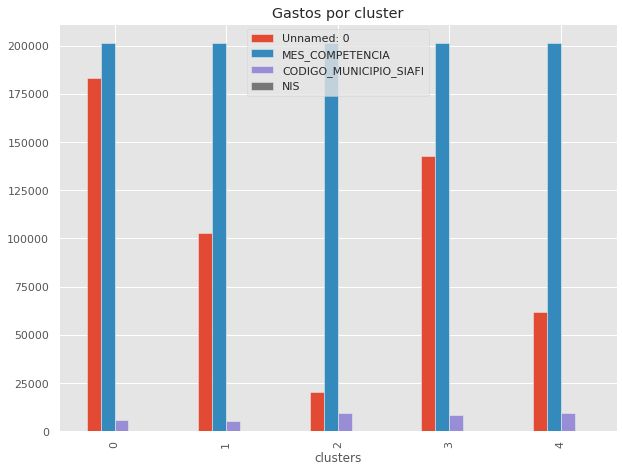

In [9]:
data_array = data.values
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=1234)
#k-means++ (ponstos afastados) e n_init=10, execução de 10 execuções do algoritmo
data["clusters"] = kmeans.fit_predict(data_array)
data.groupby("clusters").aggregate("mean").plot.bar(figsize=(10,7.5))
plt.title("Gastos por cluster")

Text(0, 0.5, 'Inércia total')

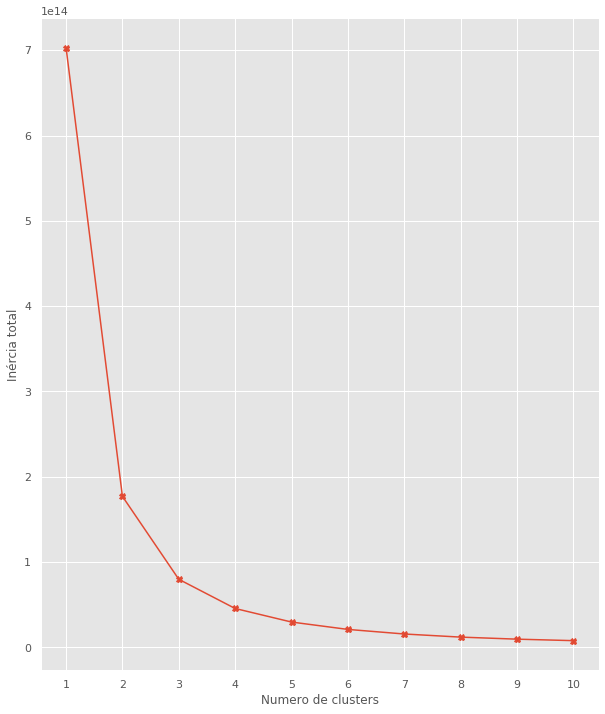

In [10]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1234)
    kmeans.fit(data.values)
    inertia.append((i,kmeans.inertia_,))
#plt.figure(figsize=(10,10))
plt.plot([w[0] for w in inertia],[w[1] for w in inertia], marker="X")
plt.xticks([w[0] for w in inertia])
plt.xlabel("Numero de clusters")
plt.ylabel("Inércia total")